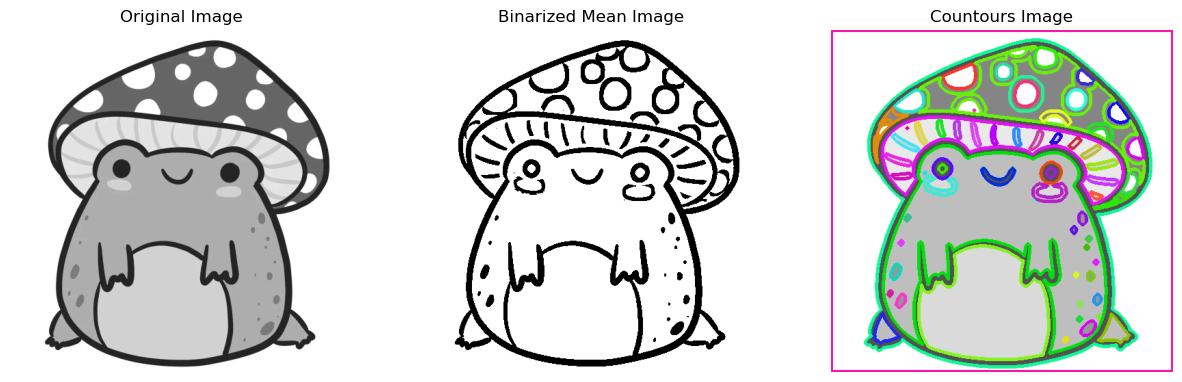

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rng

#image loadiing and resizing
og_image_gray = cv2.imread('../../assets/rana_hongo.png', cv2.IMREAD_GRAYSCALE)
image_gray = cv2.resize(og_image_gray, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

#image adaptive binarization
binarized_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13,2)

#set random seed for color reproducibility
rng.seed(45523)

#contour detection
contours, _ = cv2.findContours(binarized_mean, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
contour_img_clean = np.ones(contour_img.shape, dtype=np.uint8) * 255

#draw contours
colors = [None]*len(contours)
for i in range(len(contours)):

  #colors are randomly generated, with a bias towards saturated colors
  colors[i] = (rng.randint(191,255),rng.randint(0,255),rng.randint(0,63))

  #color channel randomization
  colors[i] = sorted(colors[i], key=lambda x: rng.random())

  contour_img = cv2.drawContours(contour_img, contours, i, colors[i], 3)
  contour_img_clean = cv2.drawContours(contour_img_clean, contours, i, colors[i], 2, cv2.LINE_AA)

#image file saving (uncomment to save images)
# cv2.imwrite('binarized_mean.png', binarized_mean)
# cv2.imwrite('contours.png', contour_img)
# cv2.imwrite('center_mass.png', center_mass)

#convert images to RGB for matplotlib
contour_img = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

#figure sizing
imgRatio = image_gray.shape[1] / image_gray.shape[0]
plt.gcf().set_size_inches(5*imgRatio*3, 5)

#image plotting
ax = plt.subplot(131)
ax.set_title('Original Image')
ax.axis('off')
ax.imshow(image_gray, cmap='gray')

ax = plt.subplot(132)
ax.set_title('Binarized Mean Image')
ax.axis('off')
ax.imshow(binarized_mean, cmap='gray')

ax = plt.subplot(133)
ax.set_title('Countours Image')
ax.axis('off')
ax.imshow(contour_img)



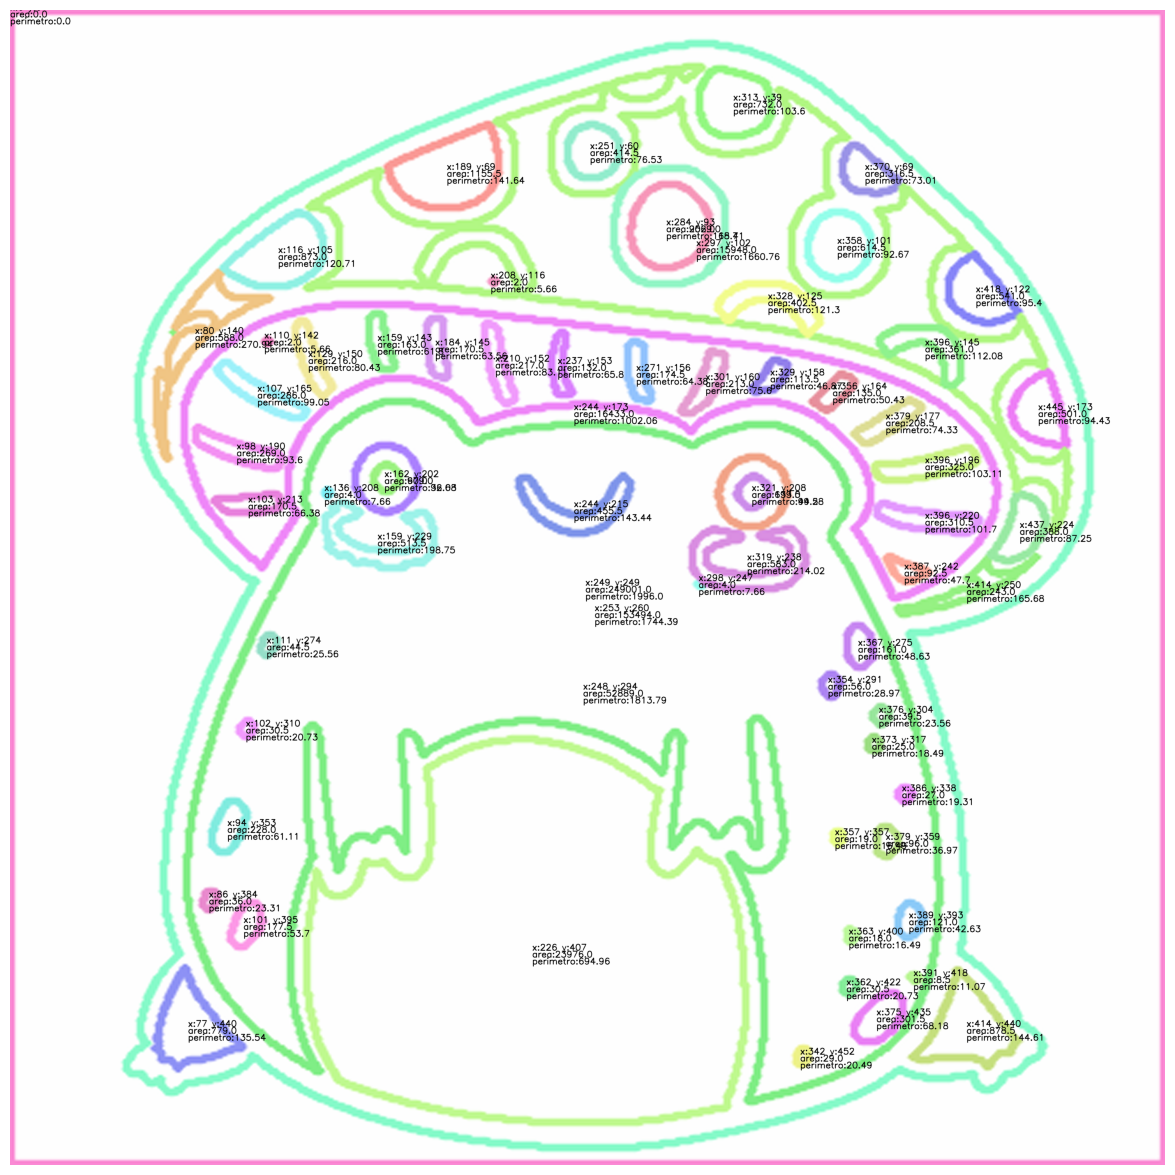

In [64]:
#moment and center mass calculation
mc = [None]*len(contours)
for i in range(len(contours)):
  moment = cv2.moments(contours[i])
  mc[i] = (int(moment['m10']/(moment['m00'] + 1e-10)), int(moment['m01']/(moment['m00']+ 1e-10)))

contour_img_clean = cv2.convertScaleAbs(contour_img_clean, alpha=0.5, beta=127)

scale = 8
contour_img_clean = cv2.resize(contour_img_clean, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)


for i in range(len(contours)):
  text_height = cv2.getTextSize('0', cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][1] + 2
  draw_point = np.multiply(mc[i], scale).astype(int)
  contour_img_clean = cv2.putText(
    contour_img_clean,
    f'x:{mc[i][0]} y:{mc[i][1]}',
    draw_point,
    cv2.FONT_HERSHEY_SIMPLEX, 1,
    (0,0,0), 2
  )

  draw_point = np.add(draw_point, (0, text_height))
  contour_img_clean = cv2.putText(
    contour_img_clean,
    f'area:{round(cv2.contourArea(contours[i]), 2)}',
    draw_point,
    cv2.FONT_HERSHEY_SIMPLEX, 1,
    (0,0,0), 2
  )

  draw_point = np.add(draw_point, (0, text_height))
  contour_img_clean = cv2.putText(
    contour_img_clean,
    f'perimetro:{round(cv2.arcLength(contours[i], True), 2)}',
    draw_point,
    cv2.FONT_HERSHEY_SIMPLEX, 1,
    (0,0,0), 2
  )

cv2.imwrite('contour_img_clean.png', contour_img_clean)
contour_img_clean = cv2.cvtColor(contour_img_clean, cv2.COLOR_BGR2RGB)

plt.gcf().set_size_inches(15*imgRatio*3, 15)

plt.axis('off')
plt.imshow(contour_img_clean)
